In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Stil
sns.set(style="whitegrid")

In [2]:
base_path = "../../results/wer_deltas"
datasets = {
    "cv-de-20": "cv-de-20_wer.csv",
    "cv-de-21": "cv-de-21_wer.csv",
    "cv-en-20": "cv-en-20_wer.csv",
    "cv-en-21": "cv-en-21_wer.csv",
}

# Laden und zu DataFrame kombinieren
all_data = []
for label, filename in datasets.items():
    path = os.path.join(base_path, filename)
    df = pd.read_csv(path)
    df["dataset"] = label
    all_data.append(df)

wer_df = pd.concat(all_data, ignore_index=True)

In [3]:
wer_summary = wer_df.groupby("dataset")["wer"].describe()
display(wer_summary)

,count,mean,std,min,25%,50%,75%,max
dataset,,,,,,,,
cv-de-20,3730.0,0.332215,0.345476,0.0,0.142857,0.285714,0.444444,10.400000
cv-de-21,5742.0,0.293091,0.286530,0.0,0.100000,0.250000,0.416667,6.166667
cv-en-20,1082.0,0.224177,0.267513,0.0,0.000000,0.153846,0.300000,1.666667
cv-en-21,644.0,0.228777,0.316896,0.0,0.000000,0.142857,0.333333,4.200000


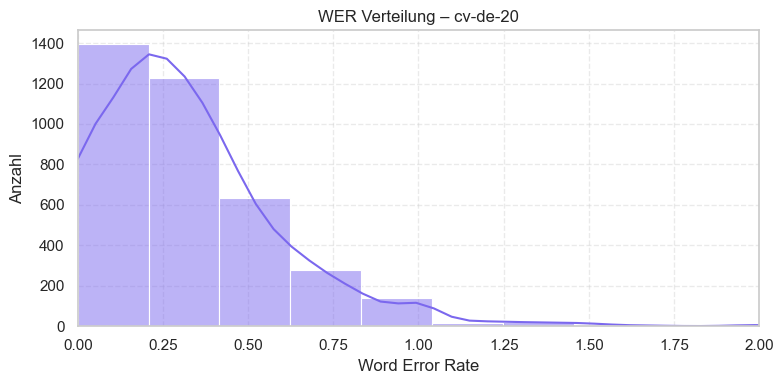

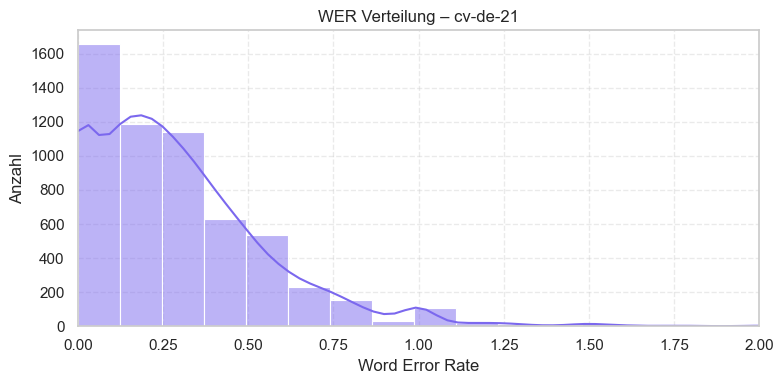

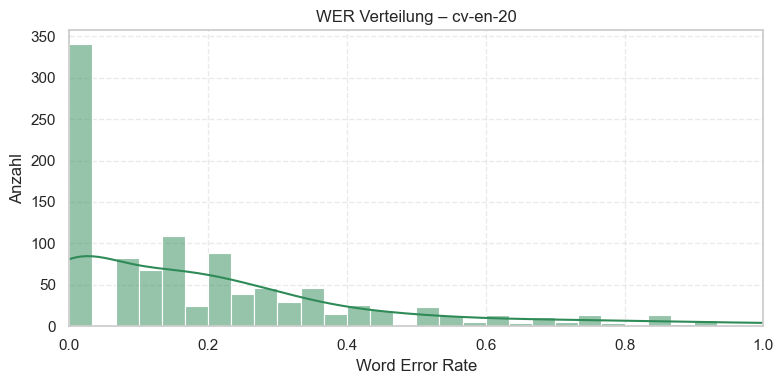

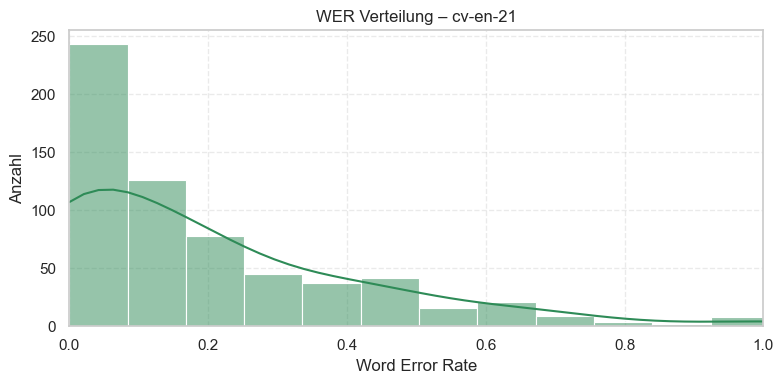

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Beispiel: WER-Daten nach Dataset filtern
datasets = wer_df["dataset"].unique()

# Farbwahl und X-Limits
plot_config = {
    "cv-de-20": {"color": "mediumslateblue", "xlim": (0, 2)},
    "cv-de-21": {"color": "mediumslateblue", "xlim": (0, 2)},
    "cv-en-20": {"color": "seagreen", "xlim": (0, 1)},
    "cv-en-21": {"color": "seagreen", "xlim": (0, 1)},
}

for ds in datasets:
    subset = wer_df[wer_df["dataset"] == ds]

    plt.figure(figsize=(8, 4))
    sns.histplot(subset["wer"], bins=50, kde=True, color=plot_config[ds]["color"])
    plt.title(f"WER Verteilung – {ds}")
    plt.xlabel("Word Error Rate")
    plt.ylabel("Anzahl")
    plt.xlim(plot_config[ds]["xlim"])
    plt.grid(True, linestyle="--", alpha=0.4)
    plt.tight_layout()
    plt.show()

In [10]:
import os
import pandas as pd
import librosa

# Mapping: dataset name → audio & tsv pfad
delta_sets = {
    "cv-de-20": {
        "tsv_path": "../../audio_files/common_voice/raw/cv-corpus-de-22.0-2025-06-20/de/validated.tsv",
        "audio_dir": "../../audio_files/common_voice/raw/cv-corpus-de-20.0-delta-2024-12-06/de/clips"
    },
    "cv-de-21": {
        "tsv_path": "../../audio_files/common_voice/raw/cv-corpus-de-22.0-2025-06-20/de/validated.tsv",
        "audio_dir": "../../audio_files/common_voice/raw/cv-corpus-de-21.0-delta-2025-03-14/de/clips"
    },
    "cv-en-20": {
        "tsv_path": "../../audio_files/common_voice/raw/cv-corpus-en-22.0-2025-06-20/en/validated.tsv",
        "audio_dir": "../../audio_files/common_voice/raw/cv-corpus-en-20.0-delta-2024-12-06/en/clips"
    },
    "cv-en-21": {
        "tsv_path": "../../audio_files/common_voice/raw/cv-corpus-en-22.0-2025-06-20/en/validated.tsv",
        "audio_dir": "../../audio_files/common_voice/raw/cv-corpus-en-21.0-delta-2025-03-14/en/clips"
    }
}


def get_total_validated_duration(tsv_path, audio_dir):
    df = pd.read_csv(tsv_path, sep="\t")
    available_files = set(os.listdir(audio_dir))

    total_duration = 0.0
    matched = 0

    for _, row in df.iterrows():
        filename = row["path"]
        if filename not in available_files:
            continue

        file_path = os.path.join(audio_dir, filename)
        try:
            duration = librosa.get_duration(path=file_path)
            total_duration += duration
            matched += 1
        except Exception as e:
            print(f"⚠️ Fehler bei {filename}: {e}")

    return total_duration / 3600, matched


# Schleife über alle delta-Segmente
for name, paths in delta_sets.items():
    hours, n_files = get_total_validated_duration(paths["tsv_path"], paths["audio_dir"])
    print(f"{name}: {hours:.2f} Stunden (aus {n_files} Dateien)")

/var/folders/20/0f1z0fvn1hvgz14x2k0l0zz00000gn/T/ipykernel_89721/4259920726.py:27: DtypeWarning: Columns (4,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(tsv_path, sep="\t")


cv-de-20: 6.16 Stunden (aus 3730 Dateien)


/var/folders/20/0f1z0fvn1hvgz14x2k0l0zz00000gn/T/ipykernel_89721/4259920726.py:27: DtypeWarning: Columns (4,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(tsv_path, sep="\t")


cv-de-21: 9.08 Stunden (aus 5742 Dateien)


/var/folders/20/0f1z0fvn1hvgz14x2k0l0zz00000gn/T/ipykernel_89721/4259920726.py:27: DtypeWarning: Columns (4,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(tsv_path, sep="\t")


cv-en-20: 1.70 Stunden (aus 1082 Dateien)


/var/folders/20/0f1z0fvn1hvgz14x2k0l0zz00000gn/T/ipykernel_89721/4259920726.py:27: DtypeWarning: Columns (4,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(tsv_path, sep="\t")


cv-en-21: 1.05 Stunden (aus 644 Dateien)
